In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing heart dataset

In [2]:
df=pd.read_csv("C:/Users/PC/Downloads/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


1] age: age in years
2] sex: sex 
       [1 = male, 0 = female]
3] cp: chest pain type 
        [Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic]
4] trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5] chol: serum cholestoral in mg/dl
6] fbs: (fasting blood sugar > 120 mg/dl) 
        [1 = true; 0 = false]
7] restecg: resting electrocardiographic results 
8] thalach: maximum heart rate achieved
9] exang: exercise induced angina 
         [1 = yes, 0 = no]
10] oldpeak = ST depression induced by exercise relative to rest
11] slope: the slope of the peak exercise ST segment 
          [Value 0: upsloping, Value 1: flat, Value 2: downsloping]
12] ca: number of major vessels (0-3) colored by flourosopy
13] thal: 
         [0 = error (in the original dataset 0 maps to NaN's), 1 = fixed defect, 2 = normal, 3 = reversable defect]
14] target (the lable): 
         [0 = no disease, 1 = disease]

In [3]:
df.head()     #Display top 5 rows of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()  #last 5 row dataset 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.shape  #to check no of rows & columns (it is not a method it is an arribute)

(1025, 14)

# Data Cleansing
Listing Null Values from data

In [6]:
df.isna().sum()  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#check duplicate data
df_dup=df.duplicated().any()
df_dup

True

In [8]:
#to drop the duplicate data
df=df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [9]:
df.shape  # more then 723 rows are duplicate on this dataset

(302, 14)

In [10]:
#Get overall statisticss about dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


# Data Visualization

<Axes: >

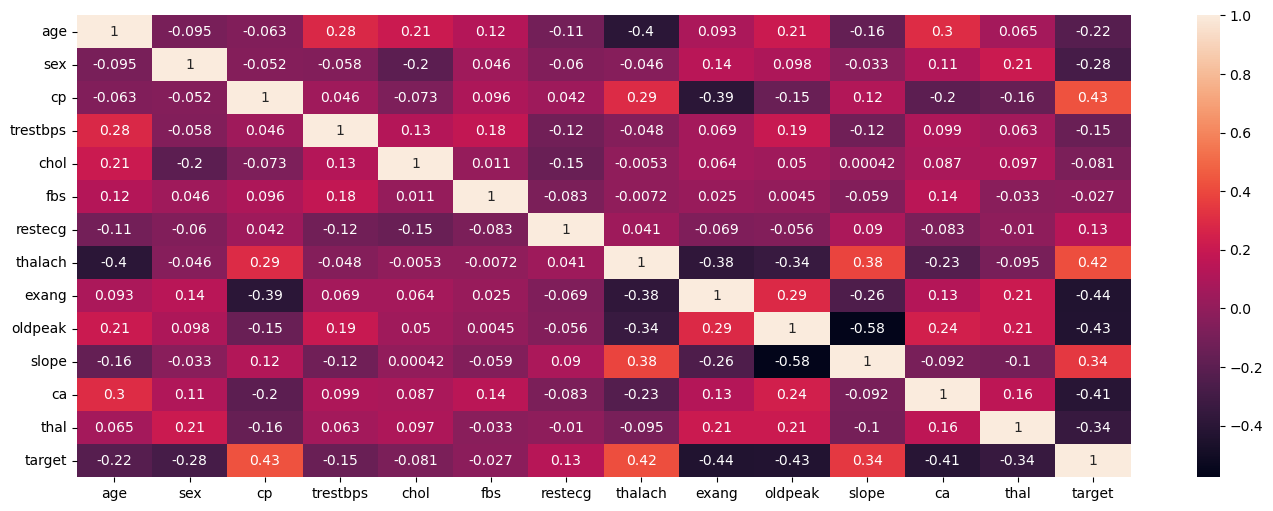

In [11]:
#draw Correlation matric
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

In [12]:
#to check how many people have heart disease or not
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

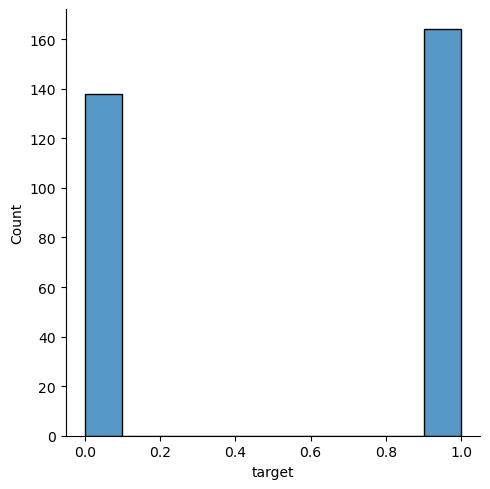

In [13]:
sns.displot(df['target'])

In [14]:
#to find count of male or female
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

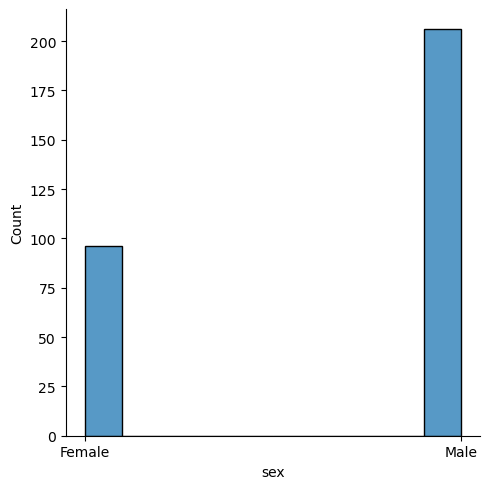

In [15]:
sns.displot(df['sex'])
plt.xticks([0,1],['Female','Male'])
plt.show()

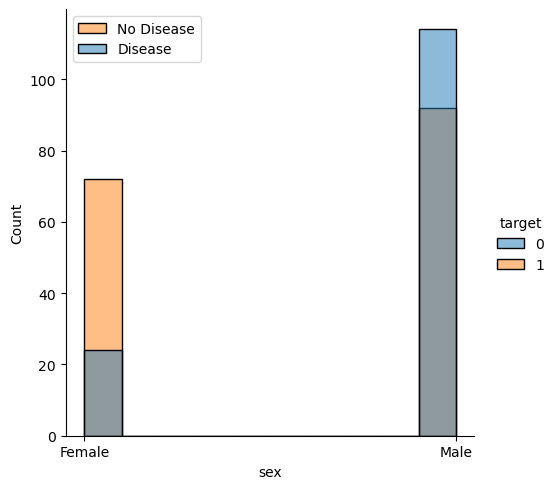

In [16]:
#to find gender distribution according to target variable
sns.displot(x="sex",hue='target',data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=["No Disease","Disease"])
plt.show()

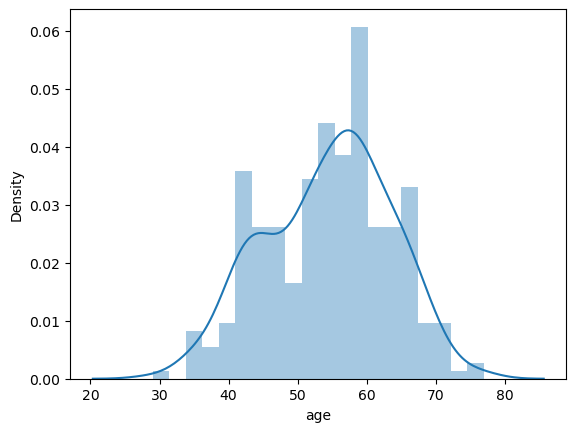

In [17]:
#check age
sns.distplot(df['age'],bins=20)
plt.show()

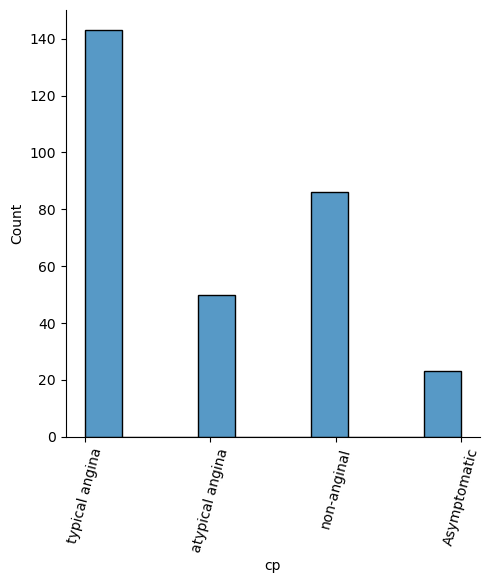

In [18]:
#to check which type of Cp is more common
sns.displot(df['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal","Asymptomatic"])
plt.xticks(rotation=75)
plt.show()

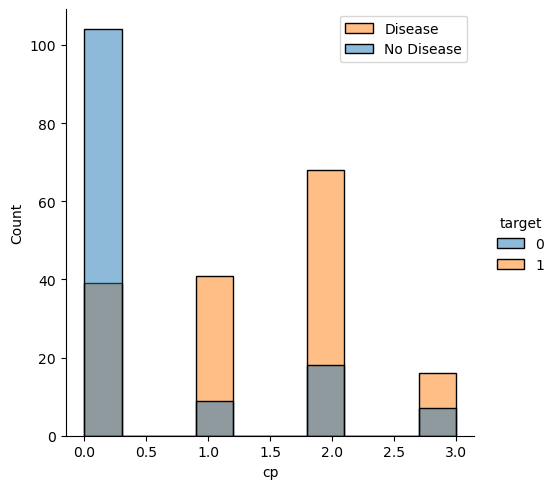

In [19]:
#cp as per target
sns.displot(x="cp",hue="target",data=df)
plt.legend(labels=["Disease","No Disease"])
plt.show()

In [20]:
#fasting blood sugar as per target
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

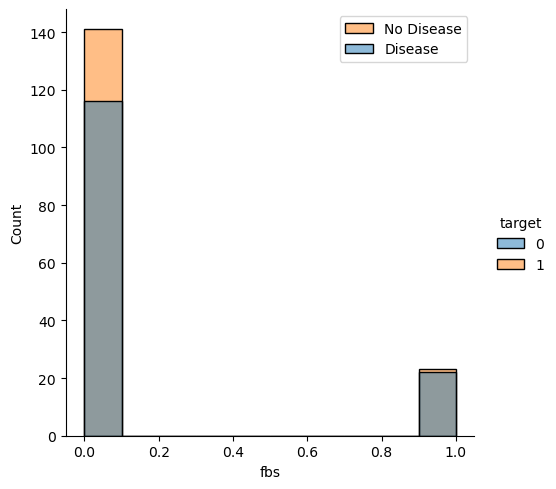

In [21]:
sns.displot(x="fbs",hue="target",data=df)
plt.legend(labels=["No Disease","Disease"])
plt.show()

<Axes: >

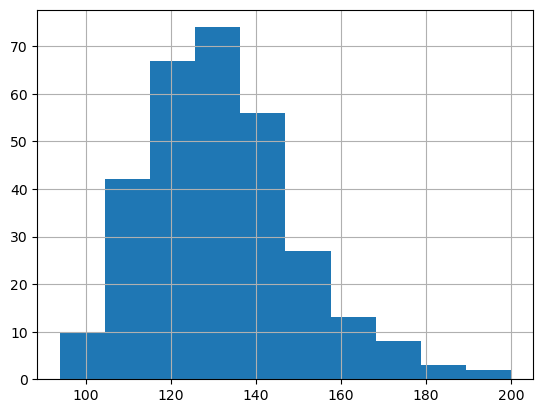

In [22]:
#check Resting Blood pressure
df["trestbps"].hist()

In [23]:
#comparing Resting Bp as per sex column

# FacetGrid Class
   It is useful for visualization the distribution of a variable or relationship b/w multiple variable separatly within subset of dataset

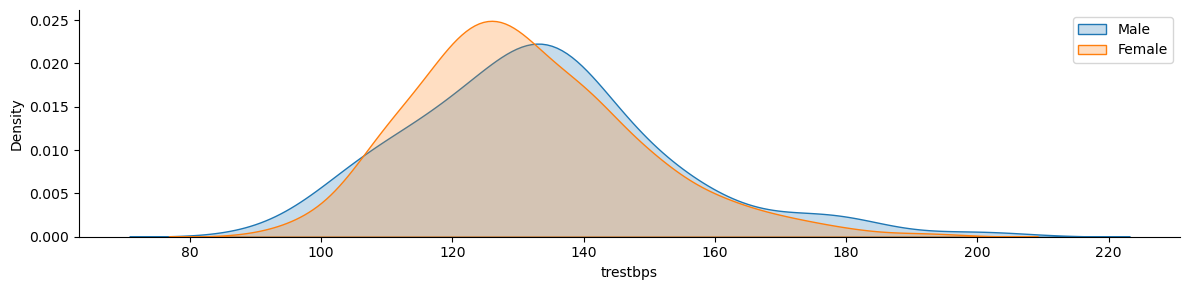

In [24]:
g=sns.FacetGrid(df,hue="sex",aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=["Male","Female"])

<Axes: >

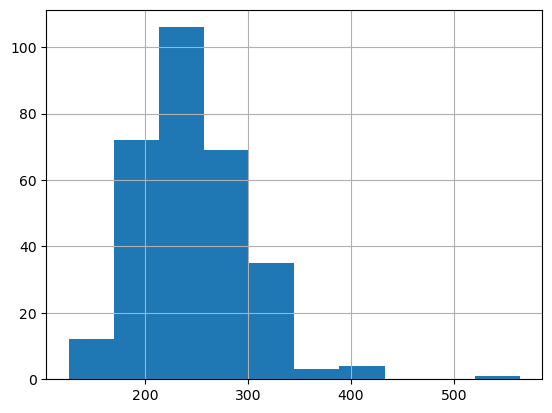

In [25]:
#Serum cholesterol
df["chol"].hist()

In [26]:
#separating categorical and continuous variables
cate_val = []
cont_val = []
for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [27]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [28]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

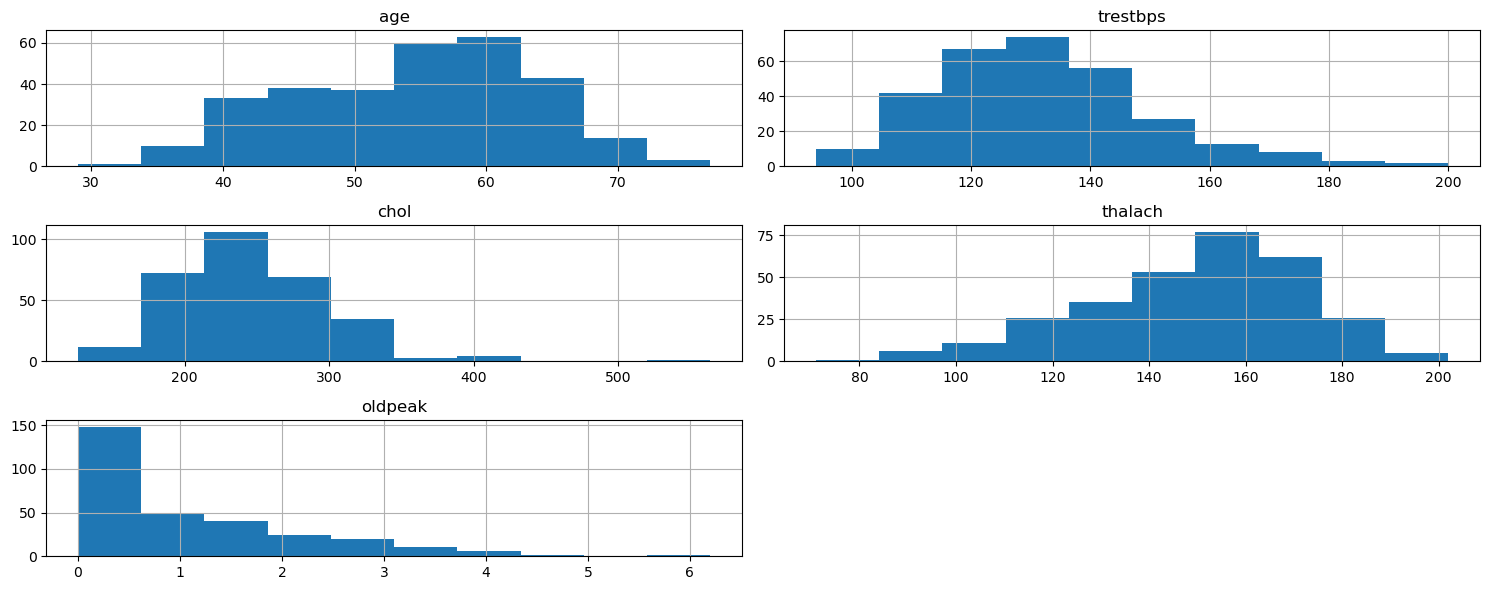

In [29]:
#ploting continuous variables
df.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

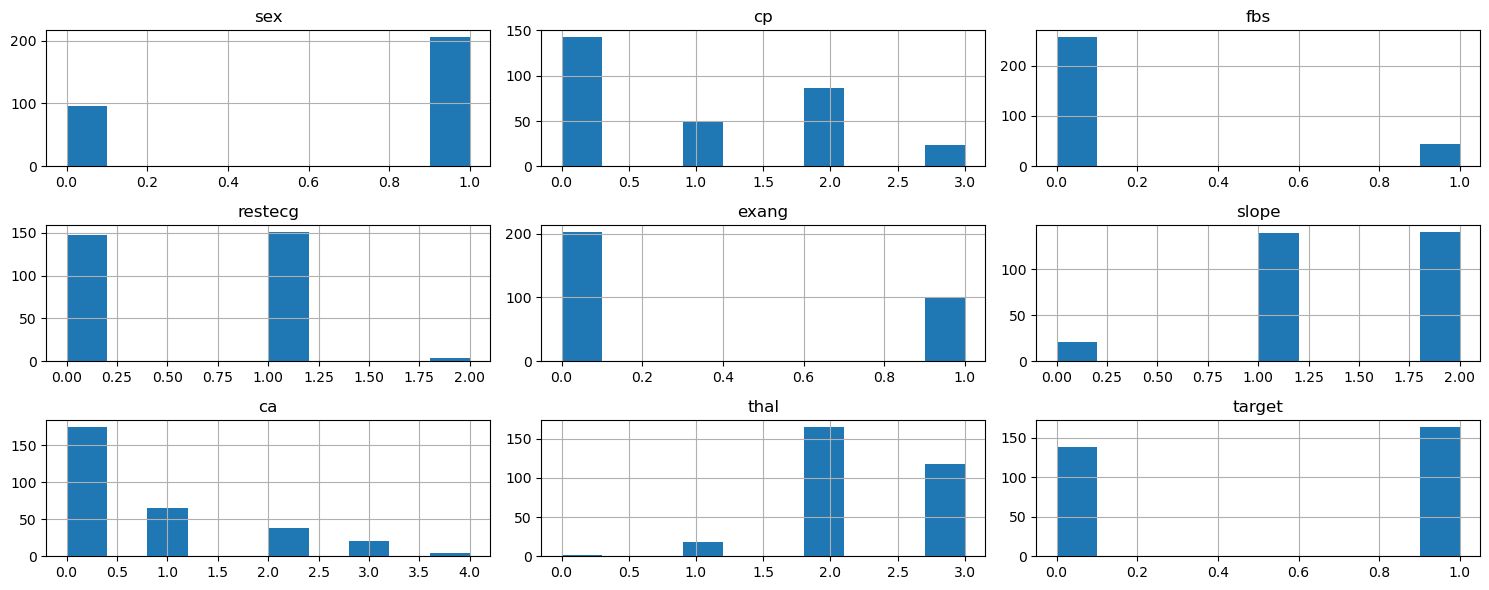

In [30]:
df.hist(cate_val,figsize=(15,6))
plt.tight_layout()
plt.show()

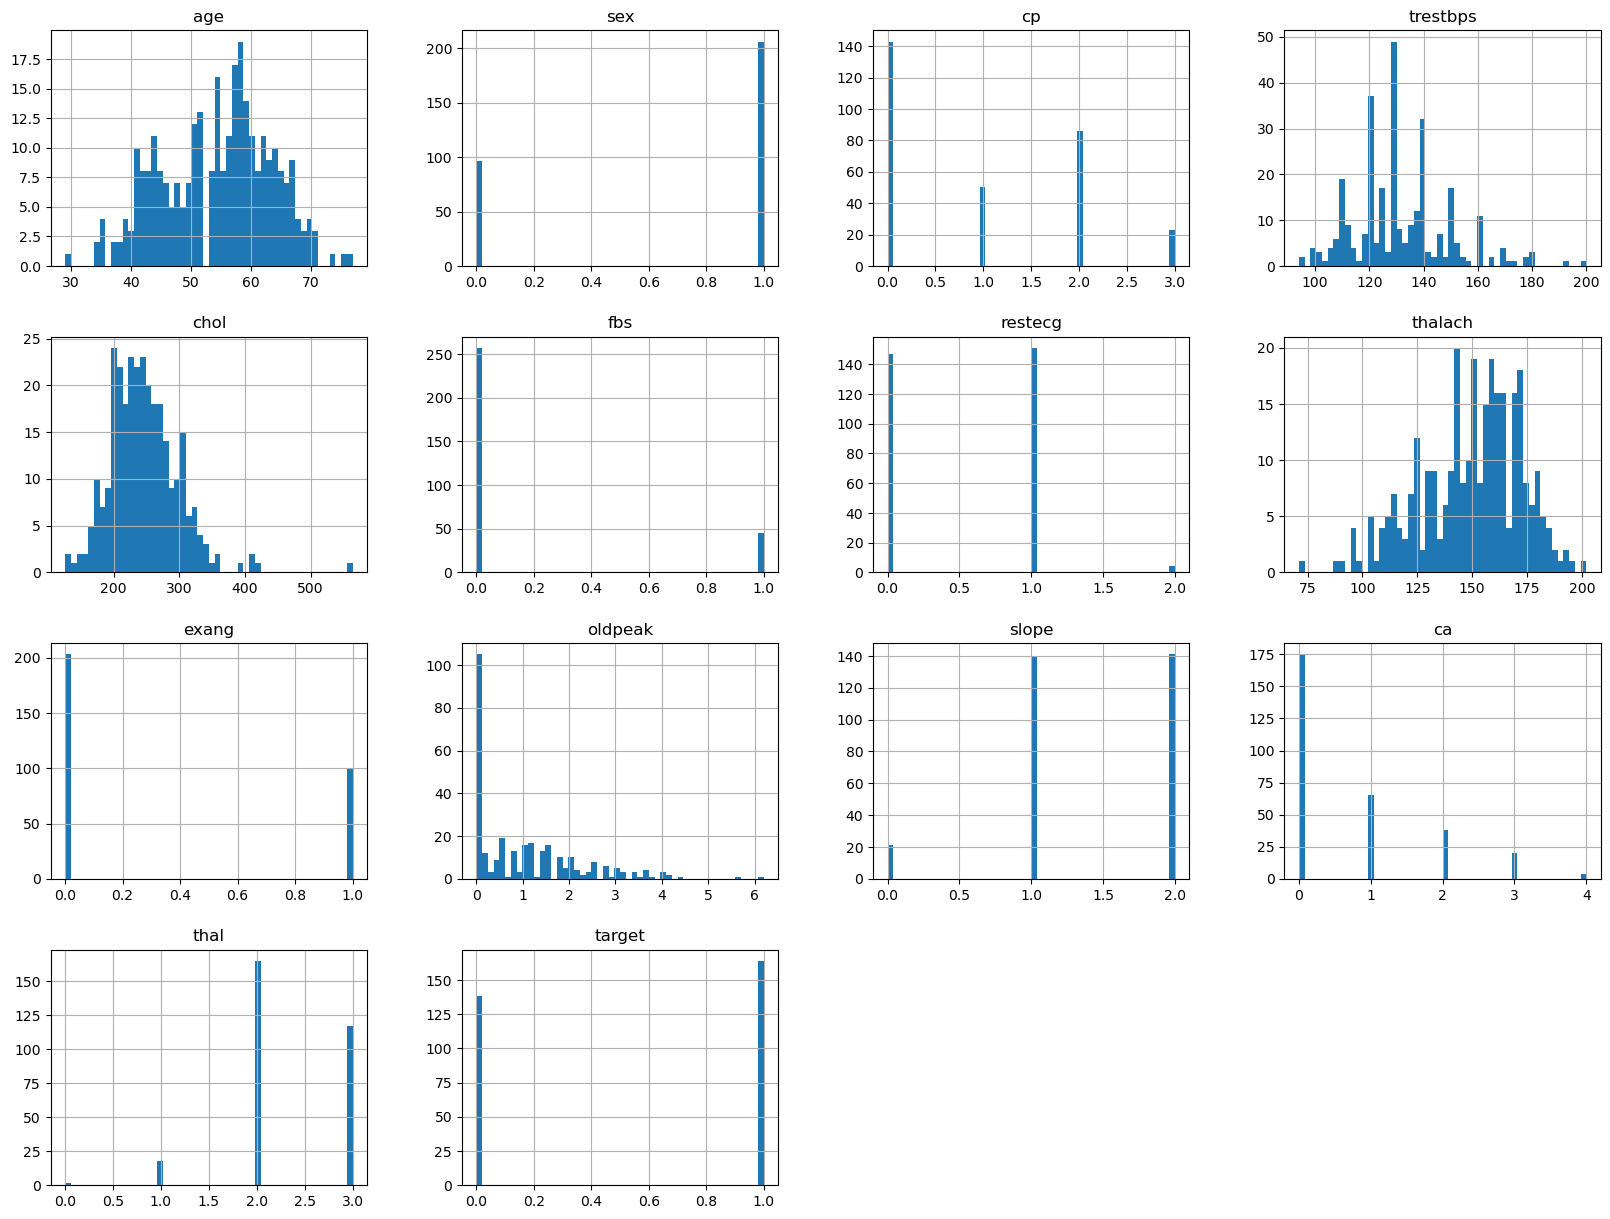

In [31]:
df.hist(bins=50,figsize=(20,15))
plt.show()

# Outliers

<Axes: >

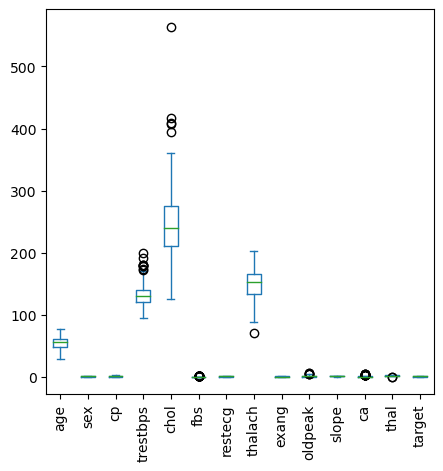

In [32]:
df.plot(kind="box",figsize=(5,5),rot=90)

In [33]:
df_num= df.select_dtypes(include=[np.number])

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_num[(df_num < lower_bound) | (df_num > upper_bound)]

In [34]:
outliers.count()

age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          24
thal         2
target       0
dtype: int64

In [35]:
for col in df_num.columns:
    col_median = df_num[col].median()
    df_num.loc[df_num[col]<lower_bound[col],col]=col_median
    df_num.loc[df_num[col]>upper_bound[col],col]=col_median

In [36]:
outliers_impute = df_num[(df_num < lower_bound) | (df_num > upper_bound)]
outliers_impute.count()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
x=df.drop(['target'],axis=1)
y=df['target']

# Dummy variable
Dummy variables is used to convert categorical variable into dummy variable and scale all the value before training  

In [38]:
ds=pd.get_dummies(df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'])
ds

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,52,125,212,168,1.0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,53,140,203,155,3.1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,70,145,174,125,2.6,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,61,148,203,161,0.0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
4,62,138,294,106,1.9,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
733,44,108,141,175,0.6,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
739,52,128,255,161,0.0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
843,59,160,273,125,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# supervised learning

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((196, 13), (196,), (106, 13), (106,))

In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cont=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
ds[cont]=ss.fit_transform(ds[cont])

In [41]:
ds.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0.839089,0.364848,0.919336,-1.905464,0.739054,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred1=log.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8490566037735849

Value Prediction for Test dataset for Logistic Regression

# SVM

In [45]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [46]:
y_pred2=svm.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8207547169811321

Value Prediction for Test dataset for SVM

# KNeighbors 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred3 = knn.predict(x_test)
accuracy_score(y_test,y_pred3)

0.6226415094339622

For each value the Kneighbors can provide accuracy

In [49]:
score = [ ]
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))
score

[0.5377358490566038,
 0.5849056603773585,
 0.660377358490566,
 0.6132075471698113,
 0.6226415094339622,
 0.6132075471698113,
 0.6320754716981132,
 0.6226415094339622,
 0.6132075471698113,
 0.6226415094339622,
 0.6132075471698113,
 0.6226415094339622,
 0.6320754716981132,
 0.6320754716981132,
 0.6132075471698113,
 0.6132075471698113,
 0.6320754716981132,
 0.6320754716981132,
 0.6792452830188679,
 0.6792452830188679,
 0.6981132075471698,
 0.6792452830188679,
 0.6509433962264151,
 0.6509433962264151,
 0.660377358490566,
 0.6509433962264151,
 0.6509433962264151,
 0.6226415094339622,
 0.6132075471698113,
 0.6320754716981132,
 0.6415094339622641,
 0.6320754716981132,
 0.6320754716981132,
 0.6320754716981132,
 0.6320754716981132,
 0.660377358490566,
 0.6698113207547169,
 0.6320754716981132,
 0.6226415094339622]

In [50]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.6132075471698113

# Non - Linear ML Algorithm 

In [51]:
df=pd.read_csv("C:/Users/PC/Downloads/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [52]:
df=df.drop_duplicates()

In [53]:
df.shape

(302, 14)

In [54]:
x=df.drop(['target'],axis=1)
y=df['target']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((196, 13), (196,), (106, 13), (106,))

# DecisionTree classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred4 = dt.predict(x_test)
accuracy_score(y_test,y_pred4)

0.7547169811320755

# RandomForest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5 = rf.predict(x_test)
accuracy_score(y_test,y_pred5)

0.8490566037735849

In [60]:
final_df = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]})

In [61]:
final_df

,Models,ACC
0,LR,0.849057
1,SVM,0.820755
2,KNN,0.622642
3,DT,0.754717
4,RF,0.849057


In [62]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [63]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Prediction on new data

In [64]:
new_data=pd.DataFrame({"age":52,
                      "sex":1,
                      "cp":0,
                      "trestbps":125,
                      "chol":212,
                      "fbs":0,
                      "restecg":1,
                      "thalach":168,
                      "exang":0,
                      "oldpeak":1.0,
                      "slope":2,
                      "ca":2,
                      "thal":3},
                      index=[0])

In [65]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [66]:
p=rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


# KMeans Cluster

In [67]:
from sklearn.cluster import KMeans

In [68]:
noc=[]
for i  in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x_train)
    noc.append(km.inertia_)
noc

[799126.2015816326,
 432049.56247452373,
 332678.011894046,
 269111.5670098496,
 228196.0180294974,
 204590.20225123156,
 184361.18642609287,
 168205.17775973148,
 153667.3195113787,
 143478.0288606857]

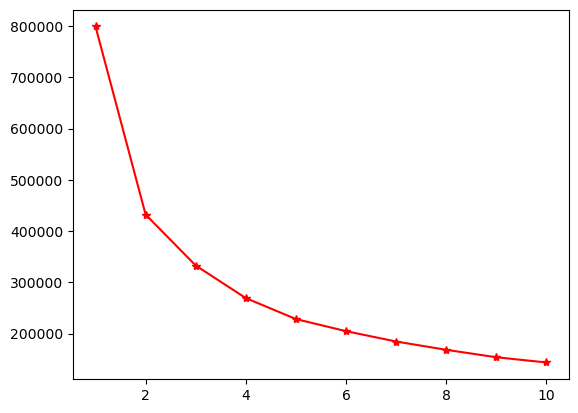

In [69]:
plt.plot(range(1,11),noc,marker="*",color="red")

In [70]:
km=KMeans(n_clusters=3)
km.fit(x_train)
km.inertia_

332678.011894046